In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

import matplotlib.pyplot as plt
import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out_learningCurve'

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out_learningCurve: 43


In [3]:
compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        'representation': res_full['data_summary']['representation'],
        #'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true'])
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [4]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [5]:
grouped_res

accuracy            f1_macro            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    25         NAME           50    0.666667  0.006667  0.663774  0.003910   
                               100   0.640000  0.020000  0.638686  0.020634   
                               250   0.593333  0.076884  0.531084  0.108319   
                               1000  0.606667  0.033333  0.604660  0.032450   
                SMILES         50    0.560000  0.041633  0.552830  0.044030   
                               100   0.673333  0.037118  0.672285  0.037859   
                               250   0.593333  0.013333  0.591492  0.012341   
                               1000  0.693333  0.063596  0.689095  0.065679   
                SMILES_random  25    0.520000       NaN  0.512987       NaN   
                               250   0.580000  0.072111  0.579789  0.071983   
                               1000  0.593333  0.013333  0.591042  0.012560   
                len_smiles     50    0.486667  0.013333  0.484309  0.012298   
                               100   0.480000  0.020000  0.474894  0.015110   
                               250   0.600000  0.020000  0.599165  0.020683   
                               1000  0.570000  0.010000  0.567526  0.008231   
                name_smiles    1000  0.660000  0.020000  0.659778  0.019966   

                                     f1_micro               kappa            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    25         NAME           50    0.666667  0.006667  0.333333  0.013333   
                               100   0.640000  0.020000  0.280000  0.040000   
                               250   0.593333  0.076884  0.192418  0.152624   
                               1000  0.606667  0.033333  0.213333  0.066667   
                SMILES         50    0.560000  0.041633  0.120000  0.083267   
                               100   0.673333  0.037118  0.346667  0.074237   
                               250   0.593333  0.013333  0.186667  0.026667   
                               1000  0.693333  0.063596  0.386667  0.127192   
                SMILES_random  25    0.520000       NaN  0.040000       NaN   
                               250   0.580000  0.072111  0.160000  0.144222   
                               1000  0.593333  0.013333  0.186667  0.026667   
                len_smiles     50    0.486667  0.013333 -0.026667  0.026667   
                               100   0.480000  0.020000 -0.040000  0.040000   
                               250   0.600000  0.020000  0.200000  0.040000   
                               1000  0.570000  0.010000  0.140000  0.020000   
                name_smiles    1000  0.660000  0.020000  0.320000  0.040000   

                                         lr      test_size       
                                       mean  sem      mean  sem  
bins num_epochs representation size                              
2    25         NAME           50    0.0003  0.0      50.0  0.0  
                               100   0.0003  0.0      50.0  0.0  
                               250   0.0003  0.0      50.0  0.0  
                               1000  0.0003  0.0      50.0  0.0  
                SMILES         50    0.0003  0.0      50.0  0.0  
                               100   0.0003  0.0      50.0  0.0  
                               250   0.0003  0.0      50.0  0.0  
                               1000  0.0003  0.0      50.0  0.0  
                SMILES_random  25    0.0003  NaN      50.0  NaN  
                               250   0.0003  0.0      50.0  0.0  
                               1000  0.0003  0.0      50.0  0.0  
                len_smiles     50    0.0003  0.0      50.0  0.0  
                               100   0.0003

# Plot learning curves

/tmp/ipykernel_62262/712994377.py:48: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
/home/jorenvanherck/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/jorenvanherck/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


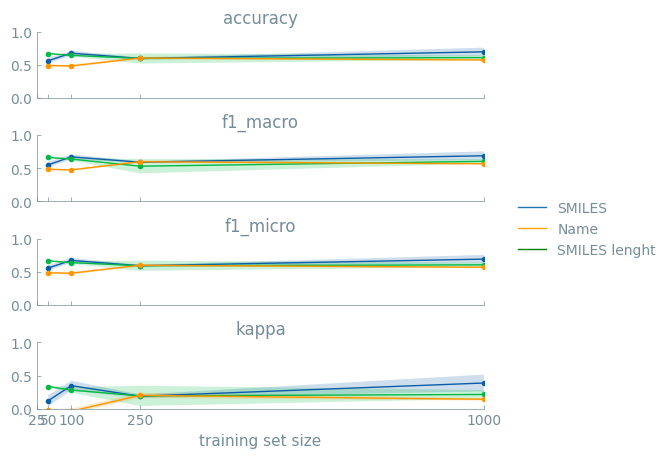

In [6]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'SMILES'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True , sharex=True)
for REPRESENTATION in ['SMILES', 'NAME', 'len_smiles']:
    for num_epochs in [25]:
        for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
            ax[i].plot(
                grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
                grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
                marker='o',
                label=f'{num_epochs} epochs'
            )
            ax[i].fill_between(
                grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
                grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
                grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
                alpha=0.2
            )
            ax[i].set_ylim(0,1)
            ax[i].set_title(metric)
            ax[i].set_xticks((list(compiled_res['size'].unique())))
        #ylabel_top('accuracy', ax=ax[0])
        #ylabel_top(r'F$_1$ macro', ax=ax[1])
        #ylabel_top(r'F$_1$ micro', ax=ax[2])
        #ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('training set size')

now = datetime.now().strftime('%Y%m%d_%H%M') 

import matplotlib.lines as mlines


legend = [mlines.Line2D([], [], color='#1f77b4', label='SMILES'),
          mlines.Line2D([], [], color='orange', label='Name'),
          mlines.Line2D([], [], color='green', label='SMILES lenght')
]
fig.legend(handles= legend, loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
fig.savefig(f'{now}-MeltingPoint-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')